In [1]:
import utils.plot_utils as plot_utils
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

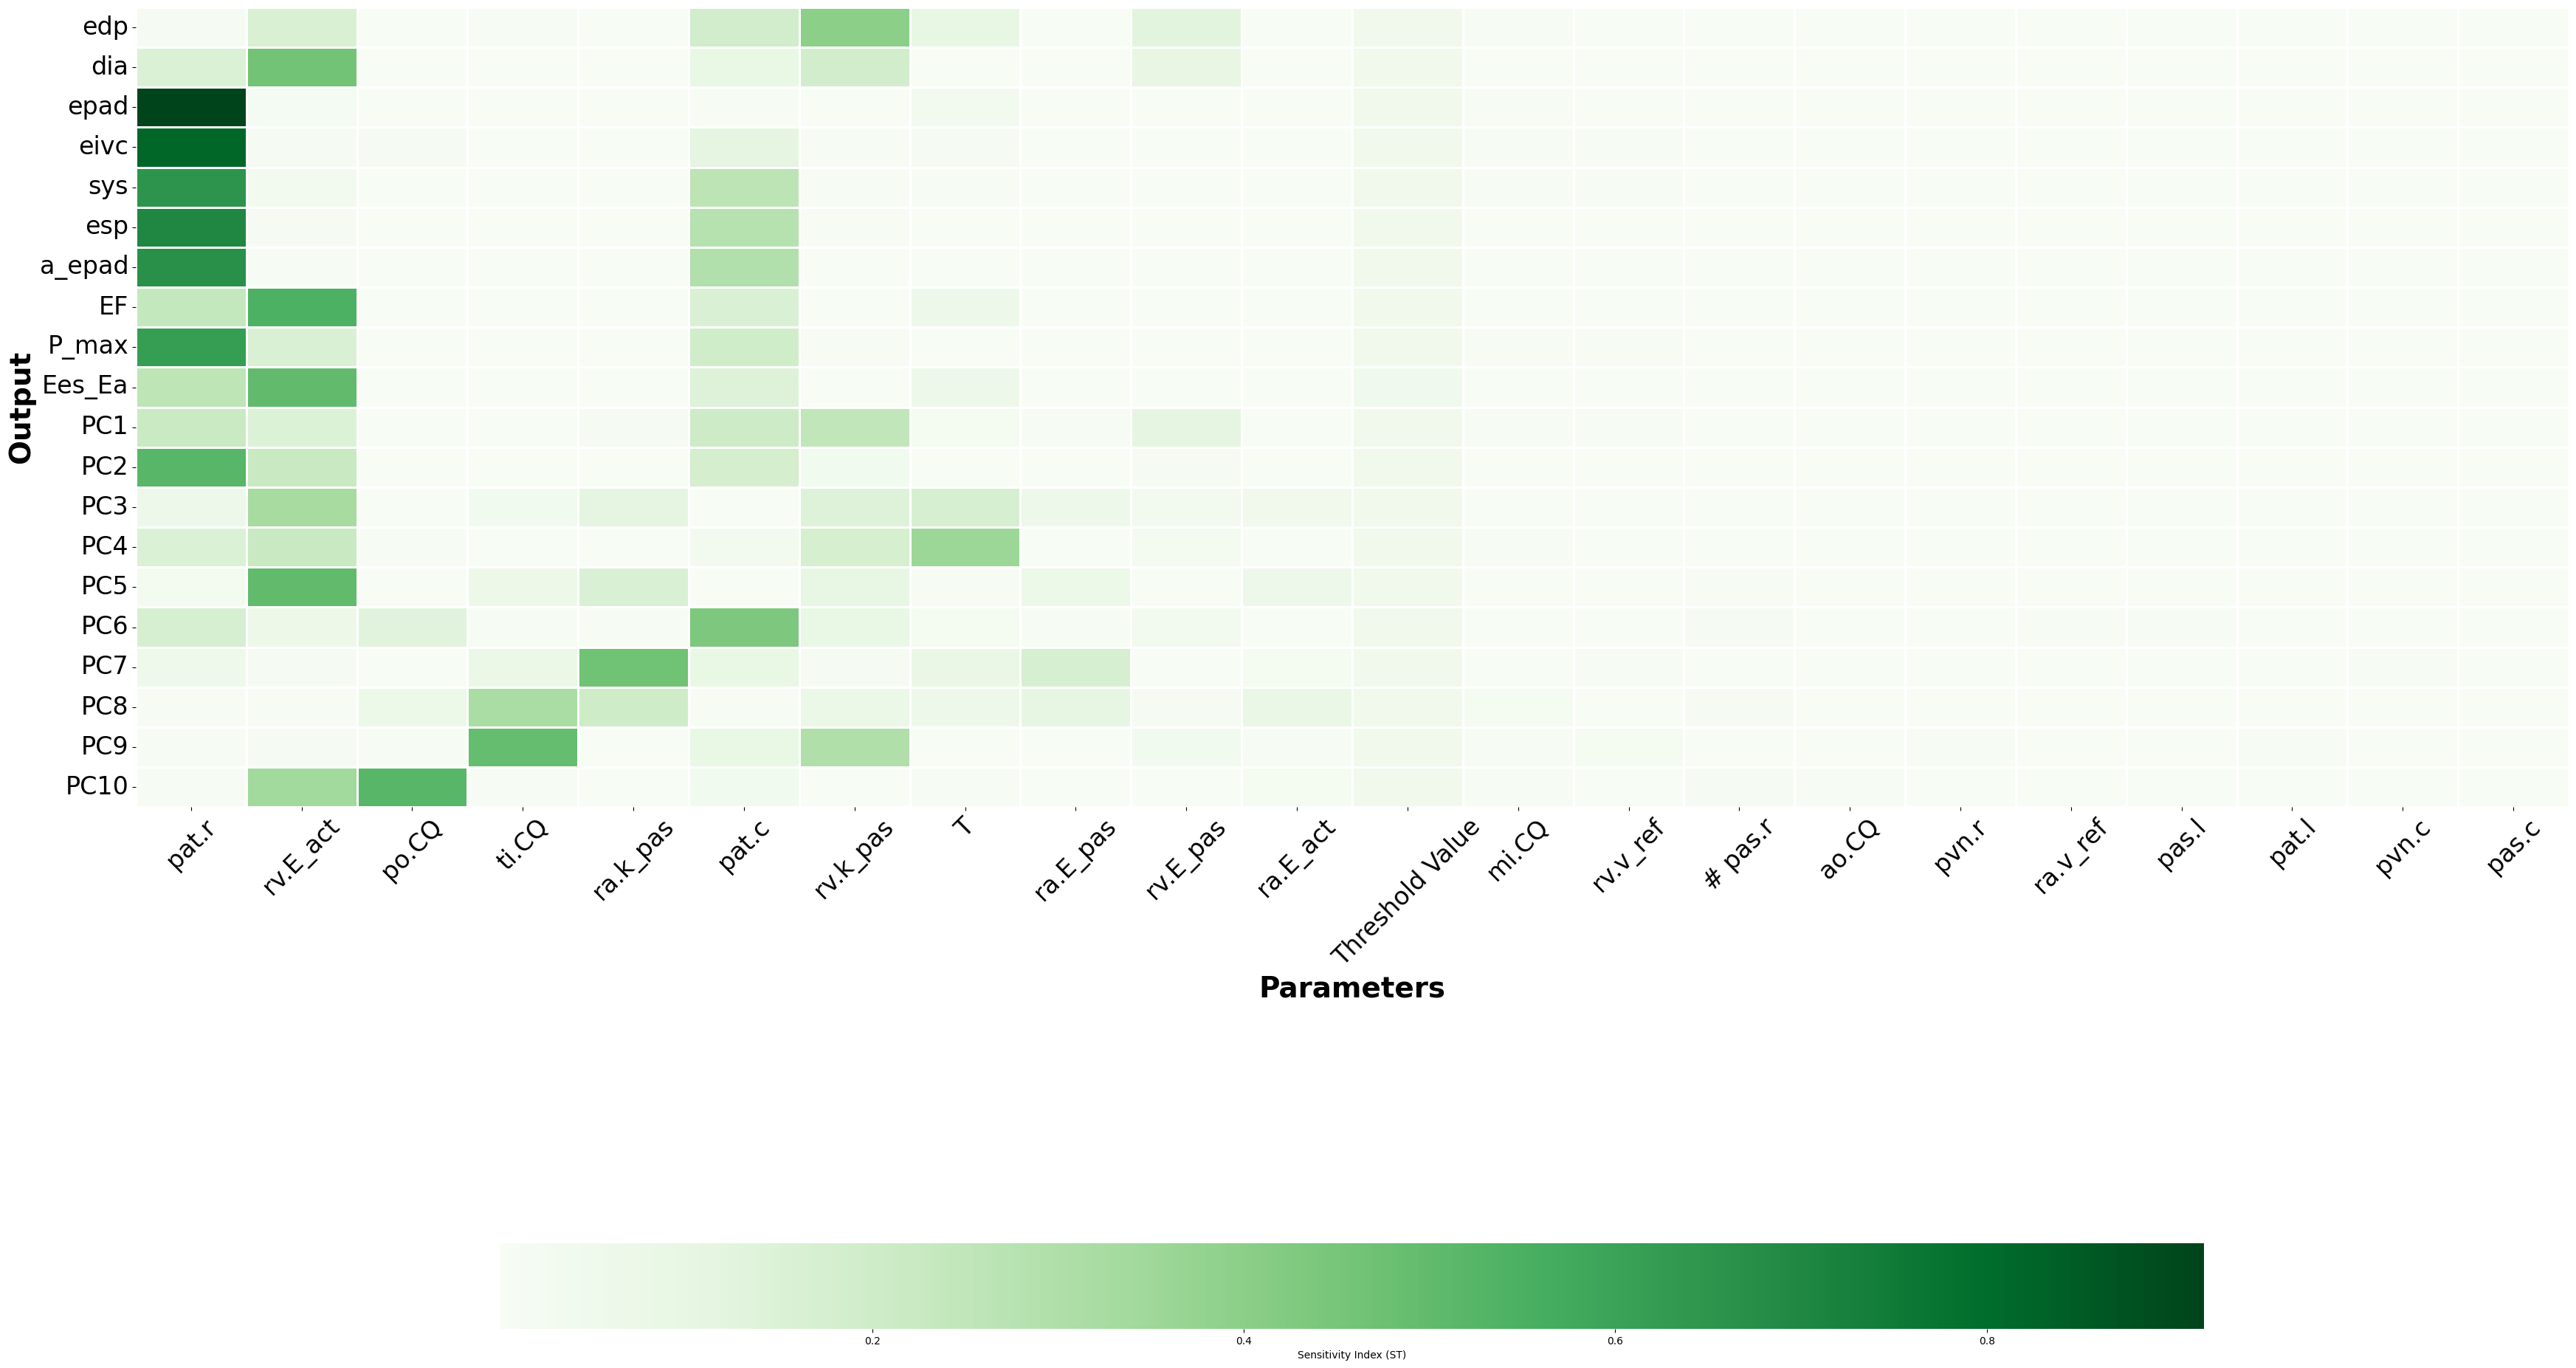

In [ ]:

output_path = '../output_synthetic/output_2000_21_params/sensitivity_analysis_results'



summary_stats = ['edp', 'dia', 'epad', 'eivc', 'sys', 'esp', 'a_epad', 'EF', 'P_max', 'Ees_Ea']
selected_files = ['sensitivity_' + stat + '.csv' for stat in summary_stats]
#plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto = 'stats', selected_keys=selected_files)

pca = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]
selected_files = ['sensitivity_' + stat + '.csv' for stat in pca]
#plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto='pca', selected_keys=selected_files)

pca123 = ["PC1", "PC2", "PC3"]


#waveform = [str(i) for i in range(101)]
#selected_files = ['sensitivity_' + stat + '.csv' for stat in waveform]
#plot_utils.plot_sensitivity_heatmap(directory = output_path,  saveto='waveform', selected_keys=selected_files)

sum_plus = summary_stats + pca
selected_files = ['sensitivity_' + stat + '.csv' for stat in sum_plus]
plot_utils.plot_sensitivity_heatmap(directory = output_path, saveto='pca+ci', selected_keys=selected_files)


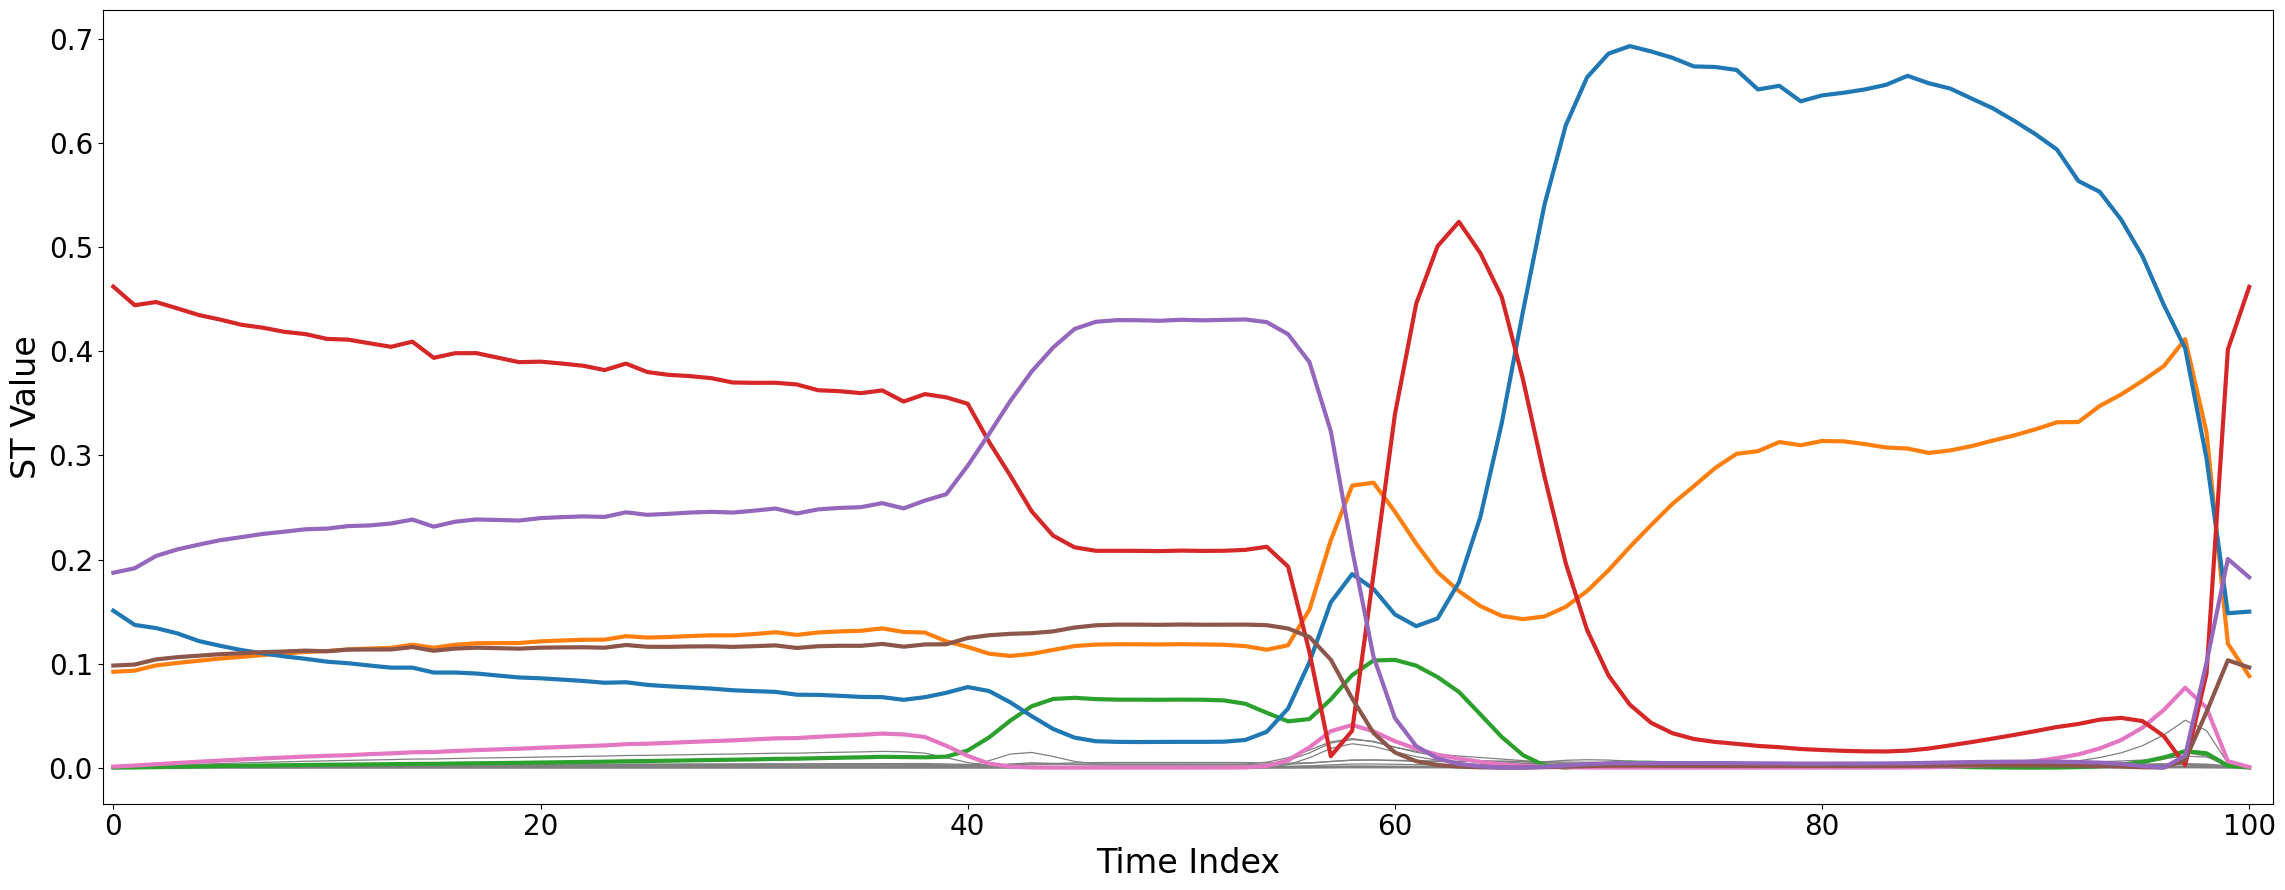

In [14]:
def plot_st_lines(st_df, all_parameters, label_params, label_offsets, highlight_colors, selected_files, show_param_labels=True):
    plt.figure(figsize=(23, 9))
    x = range(len(selected_files))
    for param in all_parameters:
        y = pd.to_numeric(st_df[param], errors='coerce')
        if param in label_params:
            color = highlight_colors[param]
            linewidth = 3
            zorder = 3
        else:
            color = "grey"
            linewidth = 0.9
            zorder = 2
        line, = plt.plot(x, y, label=param if param in label_params else None, color=color, linewidth=linewidth, zorder=zorder)
        if show_param_labels and param in label_params:
            x_offset, y_offset = label_offsets.get(param, (2, 0))
            plt.text(
                x[-1] + x_offset,
                y.iloc[-1] + y_offset,
                param,
                color=color,
                va='center',
                fontsize=16,
                fontweight='bold'
            )

    plt.xlabel('Time Index', fontsize=24)
    plt.xticks(rotation=0, fontsize=20)
    plt.xlim(-0.5,101.1)
    plt.ylabel('ST Value', fontsize=24)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

# Usage:
plot_st_lines(st_df, all_parameters, label_params, label_offsets, highlight_colors, selected_files, show_param_labels=False)


In [4]:
st_sys = pd.read_csv("../output_synthetic/output_2000_21_params/sensitivity_analysis_results/sensitivity_sys.csv")
st_sys['ST'].mean()

np.float64(0.04671989125450295)